# Giris
Yeni bir TensorFlow çalışmasından sizlere merhaba, arkadaşlar. Bu eğitimde, Pandas DataFrame'lerinin TensorFlow'a nasıl yükleneceği üzerinde çalışacağız. Bu çalışmada, Heart Disease veri setini kullanacağız.

# Pandas kullanarak veri okuma

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [2]:
# Bu kod, TensorFlow'un tf.keras.utils.get_file fonksiyonunu kullanarak bir CSV dosyasını indirir ve yerel bir dosya yolu sağlar.
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

13273/13273 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [3]:
# Pandas kutuphanesi icerisindeki read_csv fonksiyinunu kullanarak veri setini okuyoruz.
df = pd.read_csv(csv_file)

In [4]:
df.head() # ilk 5 satirin yazdirma

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [5]:
df.dtypes # her kolonun veri turlerinin gorsellestirilmesi

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [6]:
df.info() # veri seti hakkinda bilgiler icerir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [7]:
df.isnull().sum() # her kolonda bos verilerin sayisi geri gonderir

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
target = df.pop('target') # target veri kumesini ayiriyoruz.

In [9]:
target.head()

,target
0,0
1,1
2,0
3,0
4,0


# Bir dizi olarak bir DataFrame
Eğer verinizin veri tipi (dtype) uniform (tek tip) ise, bir pandas DataFrame'ini NumPy dizisi kullanabileceğiniz her yerde kullanabilirsiniz. Bunun nedeni, pandas.DataFrame sınıfının __array__ protokolünü desteklemesi ve TensorFlow'un tf.convert_to_tensor fonksiyonunun bu protokolü destekleyen nesneleri kabul etmesidir.<br>
Elimizdeki veri alan DataFrame formatındaki veri setini, NumPy array formatına dönüştüreceğiz.

In [10]:
numeric_feature_names  = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features  = df[numeric_feature_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [11]:
# int veri turunden olusan Dataframe'i tensor formatina cevirme.
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

Numpy Array : NumPy, Python'da sayısal hesaplamalar yapmak için kullanılan bir kütüphanedir. numpy.ndarray (NumPy array), homojen veri türlerine sahip, çok boyutlu bir dizidir. <br>
TensorFlow Tensor: TensorFlow Tensor'ları, NumPy array'lerine benzer çok boyutlu dizilerdir. Ancak, TensorFlow tensor'ları özellikle derin öğrenme ve makine öğrenmesi işlemleri için optimize edilmiştir.<br>

Benzerlikler:
- Her ikisi de çok boyutlu veri yapılarıdır.
- İkisi de sayısal hesaplamalar ve matematiksel işlemler için kullanılır.
- NumPy array'leri ve TensorFlow tensor'ları arasında dönüşüm yapılabilir (örneğin, bir NumPy array'ini TensorFlow tensor'una dönüştürmek).

Farklar:
- Veri Yapısı ve Kullanım Alanı: NumPy array'leri genel bilimsel hesaplamalar için kullanılırken, TensorFlow tensor'ları özellikle makine öğrenmesi ve derin öğrenme için optimize edilmiştir.
- Hesaplama Ortamı: TensorFlow tensor'ları, CPU ve GPU üzerinde paralel hesaplamaları optimize ederken, NumPy dizileri sadece CPU üzerinde çalışır.
- Dönüşüm: NumPy array'leri genellikle CPU tabanlıdır, oysa TensorFlow tensor'ları GPU ve TPU üzerinde çalışacak şekilde optimize edilebilir.

## Model.fit ile Egitim
Bu bölümde veri setimizi eğitim için hazırlayacağız:
- İlk olarak normalizasyon işlemi uygulayacağız.
- Daha sonra .adapt fonksiyonu ile normalize edilen verileri adapte edeceğiz.
- Modeli hazırlayacağız.
- Son olarak da eğitimini yapacağız.

In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [13]:
normalizer.adapt(np.array(numeric_features))

In [14]:
normalizer(numeric_features.iloc[:3]) # ilk uc verilerimiz

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93384   ,  0.03480783,  0.74578166, -0.26008663,  1.0680453 ],
       [ 1.3782114 , -1.7806157 ,  1.5923294 ,  0.75738776,  0.38022864],
       [ 1.3782114 , -0.87290394, -0.6651312 , -0.33687717,  1.3259765 ]],
      dtype=float32)>

In [15]:
# Modelin hazirlanmasi
def get_basic_model():
  model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(10, activation = 'relu'),
      tf.keras.layers.Dense(10, activation = 'relu'),
      tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer = 'adam',
                loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                metrics = ['accuracy'])

  return model

In [16]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7670 - loss: 0.6242
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7178 - loss: 0.5359
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7114 - loss: 0.4986
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7548 - loss: 0.4799
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7590 - loss: 0.5029
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7282 - loss: 0.4615
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7575 - loss: 0.4518
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7738 - loss: 0.4859
Epoch 9/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.4225
Epoch 10/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8073 - loss: 0.4117
Epoch 11/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7549 - loss: 0.4259
Epoch 12/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

## tf.data ile Egitim
Bu bölümde veri kümesini tf.data.Dataset.from_tensor_slices fonksiyonu ile TensorFlow veri seti olarak oluşturacağız. Önceden hazırladığımız model üzerinde TensorFlow veri setini eğiteceğiz.

In [17]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

for row in numeric_dataset.take(5):
  print(row)

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 63. , 150. , 145. , 233. ,   2.3])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 108. , 160. , 286. ,   1.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 129. , 120. , 229. ,   2.6])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 37. , 187. , 130. , 250. ,   3.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 41. , 172. , 130. , 204. ,   1.4])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [18]:
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

model = get_basic_model()
model.fit(numeric_batches, epochs=15)

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6919 - loss: 0.7007
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7266 - loss: 0.5645
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.5154
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7295 - loss: 0.4840
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7248 - loss: 0.5054
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7561 - loss: 0.4287
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7398 - loss: 0.4411
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7356 - loss: 0.4679
Epoch 9/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7903 - loss: 0.4142
Epoch 10/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7163 - loss: 0.4801
Epoch 11/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7725 - loss: 0.4417
Epoch 12/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# Bir sözlük olarak bir DataFrame
Heterojen verilerle uğraşmaya başladığınızda, DataFrame'i tek bir diziymiş gibi ele almak artık mümkün değildir. TensorFlow tensörleri, tüm öğelerin aynı veri türüne sahip olmasını gerektirir.

Yani bu durumda, her sütunun tek tip veri türüne sahip olduğu bir sütun sözlüğü olarak ele almaya başlamanız gerekir. Bir DataFrame, dizilerin sözlüğüne çok benzer, bu yüzden genellikle yapmanız gereken tek şey DataFrame'i bir Python sözlüğüne dönüştürmektir. Birçok önemli TensorFlow API'si, girdi olarak dizilerin (iç içe geçmiş) sözlüklerini destekler

tf.data giriş hatları bunu oldukça iyi halleder.

In [19]:
numeric_features_dict = {key: value.to_numpy()[:, tf.newaxis] for key, value in dict(numeric_features).items()}
target_array =  target.to_numpy()[:, tf.newaxis]

In [20]:
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((numeric_features_dict, target_array))

In [21]:
len(numeric_features_dict)

5

In [22]:
for row in numeric_dict_ds.take(3):
  print(row)

({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([63])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([150])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([145])>, 'chol': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([233])>, 'oldpeak': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.3])>}, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>)
({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([67])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([108])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([160])>, 'chol': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([286])>, 'oldpeak': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([1.5])>}, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>)
({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([67])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([129])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([120])

Genellikle Keras modelleri ve katmanları tek bir giriş tensörü bekler, ancak bu sınıflar sözlüklerin, tuple'ların ve tensörlerin iç içe geçmiş yapılarını kabul edebilir ve döndürebilir.

Giriş olarak sözlük kabul eden bir Keras modelini yazmanın iki eşdeğer yolu vardır.

## 1. Model-alt sınıf stili

In [23]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.normalizer = tf.keras.layers.Normalization(axis = -1) # Verileri normalleştirmek için kullanılan bir normalizasyon katmanı.

    #  Modelin ana sinir ağı yapısıdır.
    self.seq = tf.keras.Sequential([
        self.normalizer,
        tf.keras.layers.Dense(10, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'relu'),
        tf.keras.layers.Dense(1)
    ])

    self.concat = tf.keras.layers.Concatenate(axis = -1) # Birden fazla özelliği (input) birleştiren bir katman. Veriler, eksen boyunca birleştirilir.

  # Giriş olarak verilen bir sözlükteki (input_dict) özellikleri sıralı bir şekilde birleştirir.
  def _stack(self, input_dict):
    values = []
    for key, value in sorted(input_dict.items()):
      values.append(value)
    return self.concat(values)

  #Normalizasyon katmanını veriler üzerinde adapte etmek.
  def adapt(self, inputs):
    inputs = self._stack(inputs)
    self.normalizer.adapt(inputs)

  # Modelin ileri yönlü geçişini (forward pass) tanımlar.
  def call(self, inputs):
    inputs = self._stack(inputs)
    result = self.seq(inputs)

    return result

model = MyModel()

model.adapt(numeric_features_dict)

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              run_eagerly = True)

In [24]:
model.fit(numeric_features_dict, target_array, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.6992 - loss: 0.6019
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7805 - loss: 0.5048
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.7702 - loss: 0.4766
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6925 - loss: 0.5117
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7295 - loss: 0.4723


In [25]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7143 - loss: 0.4625
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.7609 - loss: 0.4365
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.7050 - loss: 0.4608
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.7568 - loss: 0.4485
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.7559 - loss: 0.4328


In [26]:
model.predict(dict(numeric_features.iloc[:3]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.26673082],
       [0.1705694 ],
       [0.671164  ]], dtype=float32)

## 2. Keras işlevsel stili

In [27]:
inputs = {}

for name, column in numeric_features_dict.items():
  inputs[name] = tf.keras.Input(
      shape = (1,), name = name, dtype = tf.float32
  )

inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=thalach>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=chol>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=oldpeak>}

In [28]:
xs = [value for key, value in sorted(inputs.items())]

concat = tf.keras.layers.Concatenate(axis = -1)
x = concat(xs)

normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.concatenate([value for key, value in sorted(numeric_features_dict.items())], axis = -1))

x = normalizer(x)
x = tf.keras.layers.Dense(10, activation = 'relu')(x)
x = tf.keras.layers.Dense(10, activation = 'relu')(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              run_eagerly = True)

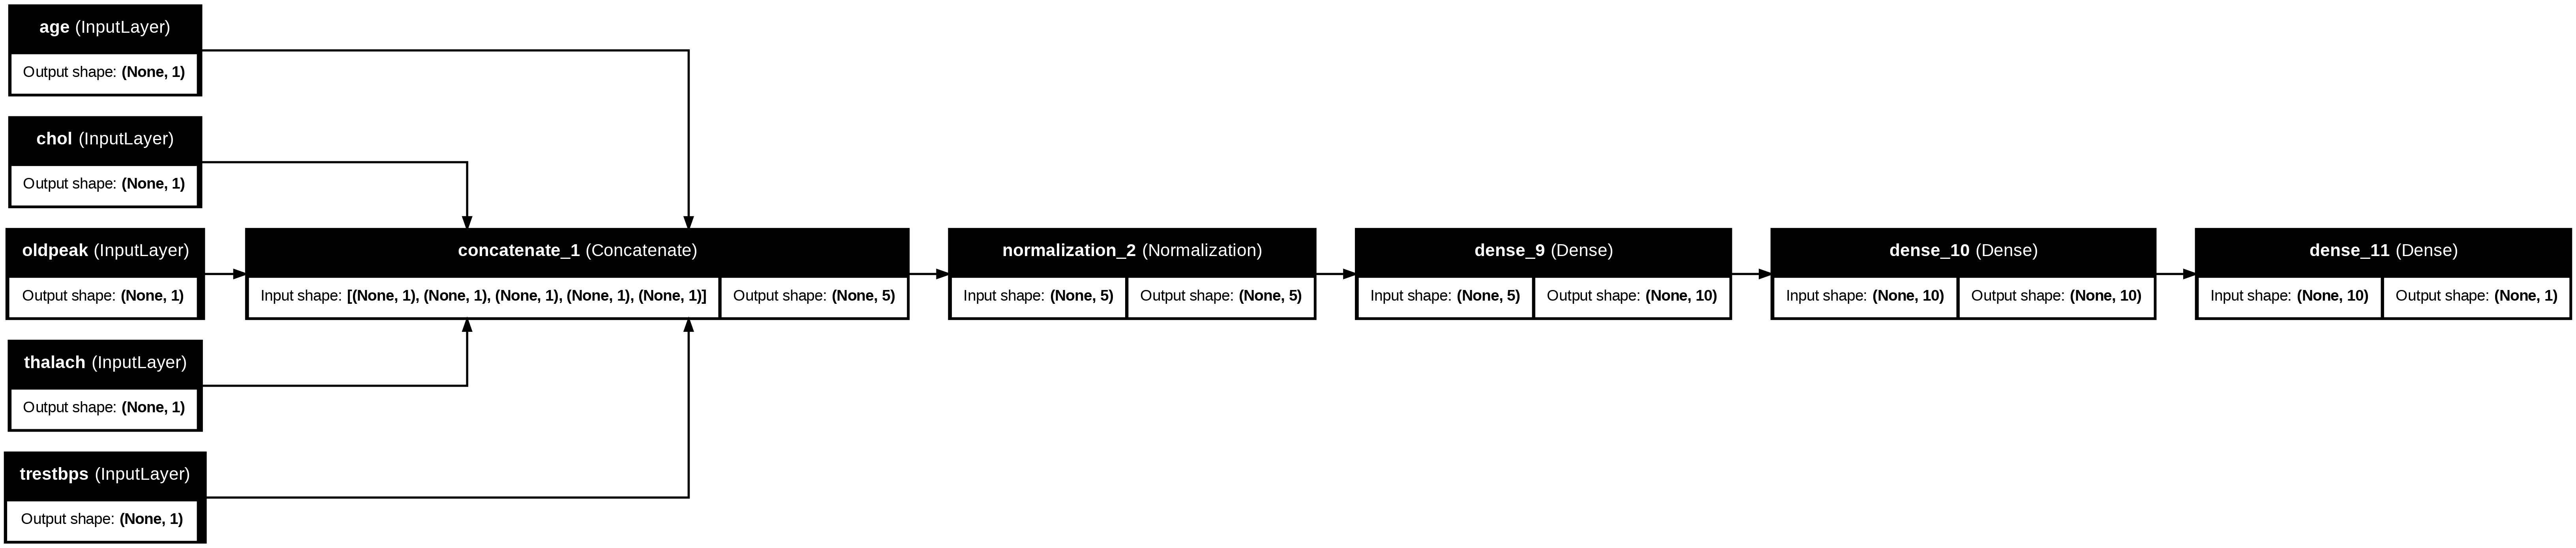

In [29]:
tf.keras.utils.plot_model(model, rankdir="LR", show_shapes=True,  show_layer_names=True)

In [30]:
model.fit(numeric_features_dict, target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.7438 - loss: 0.6300
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.6922 - loss: 0.5852
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.6886 - loss: 0.6060
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.7281 - loss: 0.5236
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.7925 - loss: 0.4488


In [31]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.8430 - loss: 0.4302
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.7836 - loss: 0.4746
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.7481 - loss: 0.4465
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7941 - loss: 0.4101
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.7342 - loss: 0.4847


İki farklı model oluşturma yöntemini gördük ve eğitimlerini gerçekleştirdik. Bu aşamada, verimizdeki tüm verileri kullanmadık; yalnızca sayısal verileri ele aldık ve bu verileri tensor formatında bir veri setine dönüştürdük. Eğitimlerinizde, iki model oluşturma yöntemini kullanabilir ve modellerinizi güncelleyebilirsiniz.

# Tam örnek
Keras'a heterojen bir DataFrame geçiriyorsanız, her sütunun benzersiz ön işleme ihtiyacı olabilir. Bu ön işlemeyi doğrudan DataFrame'de yapabilirsiniz, ancak bir modelin doğru çalışması için girdilerin her zaman aynı şekilde ön işlenmesi gerekir. Ön işlem yapmamız gerekiyor ki hem veri seti modelimiz için uygun hale gelsin hem de yaptığımız eğitim sağlıklı bir şekilde gerçekleşsin.

## Ön işleme aşamasını oluşturun
Bu veri setinde ham verilerdeki bazı "tamsayı" özellikleri aslında Kategorik endekslerdir. Bunlar sıralanmamış olduğundan doğrudan modele girilmeleri uygun değildir; model bunları sıralı olarak yorumlar. Bundan dolayı, kategorik verileri modelimiz için düzenlememiz gerekiyor. Bu aşamada bunu ele alacağız.

In [32]:
binary_feature_names = ['sex', 'fbs', 'exang']
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca']

In [33]:
inputs = {}
for name, column in df.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_feature_names or
        name in binary_feature_names):
    dtype = tf.int64
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

In [34]:
inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'sex': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 'cp': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cp>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=chol>,
 'fbs': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 'restecg': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=restecg>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=thalach>,
 'exang': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=oldpeak>,
 'slope': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=slope>,
 'ca': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=ca>,
 'thal': <KerasTensor shape=(None, 1),

### İkili girişler
İkili girdilerin herhangi bir ön işleme ihtiyacı olmadığından, yalnızca vektör eksenini eklememiz yeterli olacaktır. Bu aşamada ele alınan veriler, genellikle 0 veya 1, evet ya da hayır şeklinde iki değerden oluşan verilerdir.

In [35]:
preprocessed = []

for name in binary_feature_names:
  inp = inputs[name]
  preprocessed.append(inp)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>]

### Sayısal girdiler
Tam sayı (integer) veri türüne sahip veriler üzerinde herhangi bir işlem yapmanıza gerek yoktur. Ancak, normalizasyon işlemi ile bu değerlerin belirli bir sayı aralığına atanması daha uygun olacaktır.

In [36]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.concatenate([value for key, value in sorted(numeric_features_dict.items())], axis=1))

In [37]:
numeric_inputs = []
for name in numeric_feature_names:
  numeric_inputs.append(inputs[name])

numeric_inputs = tf.keras.layers.Concatenate(axis=-1)(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_22>]

### Kategorik özellikler
Kategorik veriler, sınıf verileri olarak adlandırılabilir. Örneğin, kategorik veriler [a, b, c, d] gibi belirli bir değer kümesinden birine sahip olan verilerdir ve bu küme dışında başka değerlere sahip olmazlar. Bu tür verilere kategorik veriler denir. Bu bölümde, kategorik verileri modelimizde kullanabilmek için ön işlemler uygulayacağız. Örnek olarak, bu veriler [0, 1, 2, 3] gibi sayısal değerlere dönüştürülebilir ve model için uygun hale getirilebilir.

In [38]:
vocab = ['a','b','c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c','a','a','b','zzz'])

<tf.Tensor: shape=(5, 4), dtype=int64, numpy=
array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])>

Yukaridaki gorsellestirmede veriler array formatina donusturulmus.<br>
array([[0, 0, 0, 1], = 'c' <br>
       [0, 1, 0, 0], = 'a' <br>
       [0, 1, 0, 0], = 'a' <br>
       [0, 0, 1, 0], = 'b' <br>
       [1, 0, 0, 0]])> = 'zzz'

In [39]:
vocab = [1,4,7,99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

lookup([-1,4,1])

<tf.Tensor: shape=(3, 5), dtype=int64, numpy=
array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])>

In [40]:
for name in categorical_feature_names:
  vocab = sorted(set(df[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name]
  x = lookup(x)
  preprocessed.append(x)

name: cp
vocab: [0, 1, 2, 3, 4]

name: restecg
vocab: [0, 1, 2]

name: slope
vocab: [1, 2, 3]

name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]



### Ön işleme bölümlerini birleştirin

In [41]:
preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_22>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_23>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_24>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_25>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_26>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_27>]

In [42]:
preprocessed_result = tf.keras.layers.Concatenate(axis=1)(preprocessed)
preprocessed_result

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, name=keras_tensor_28>

In [43]:
preprocessor = tf.keras.Model(inputs, preprocessed_result)

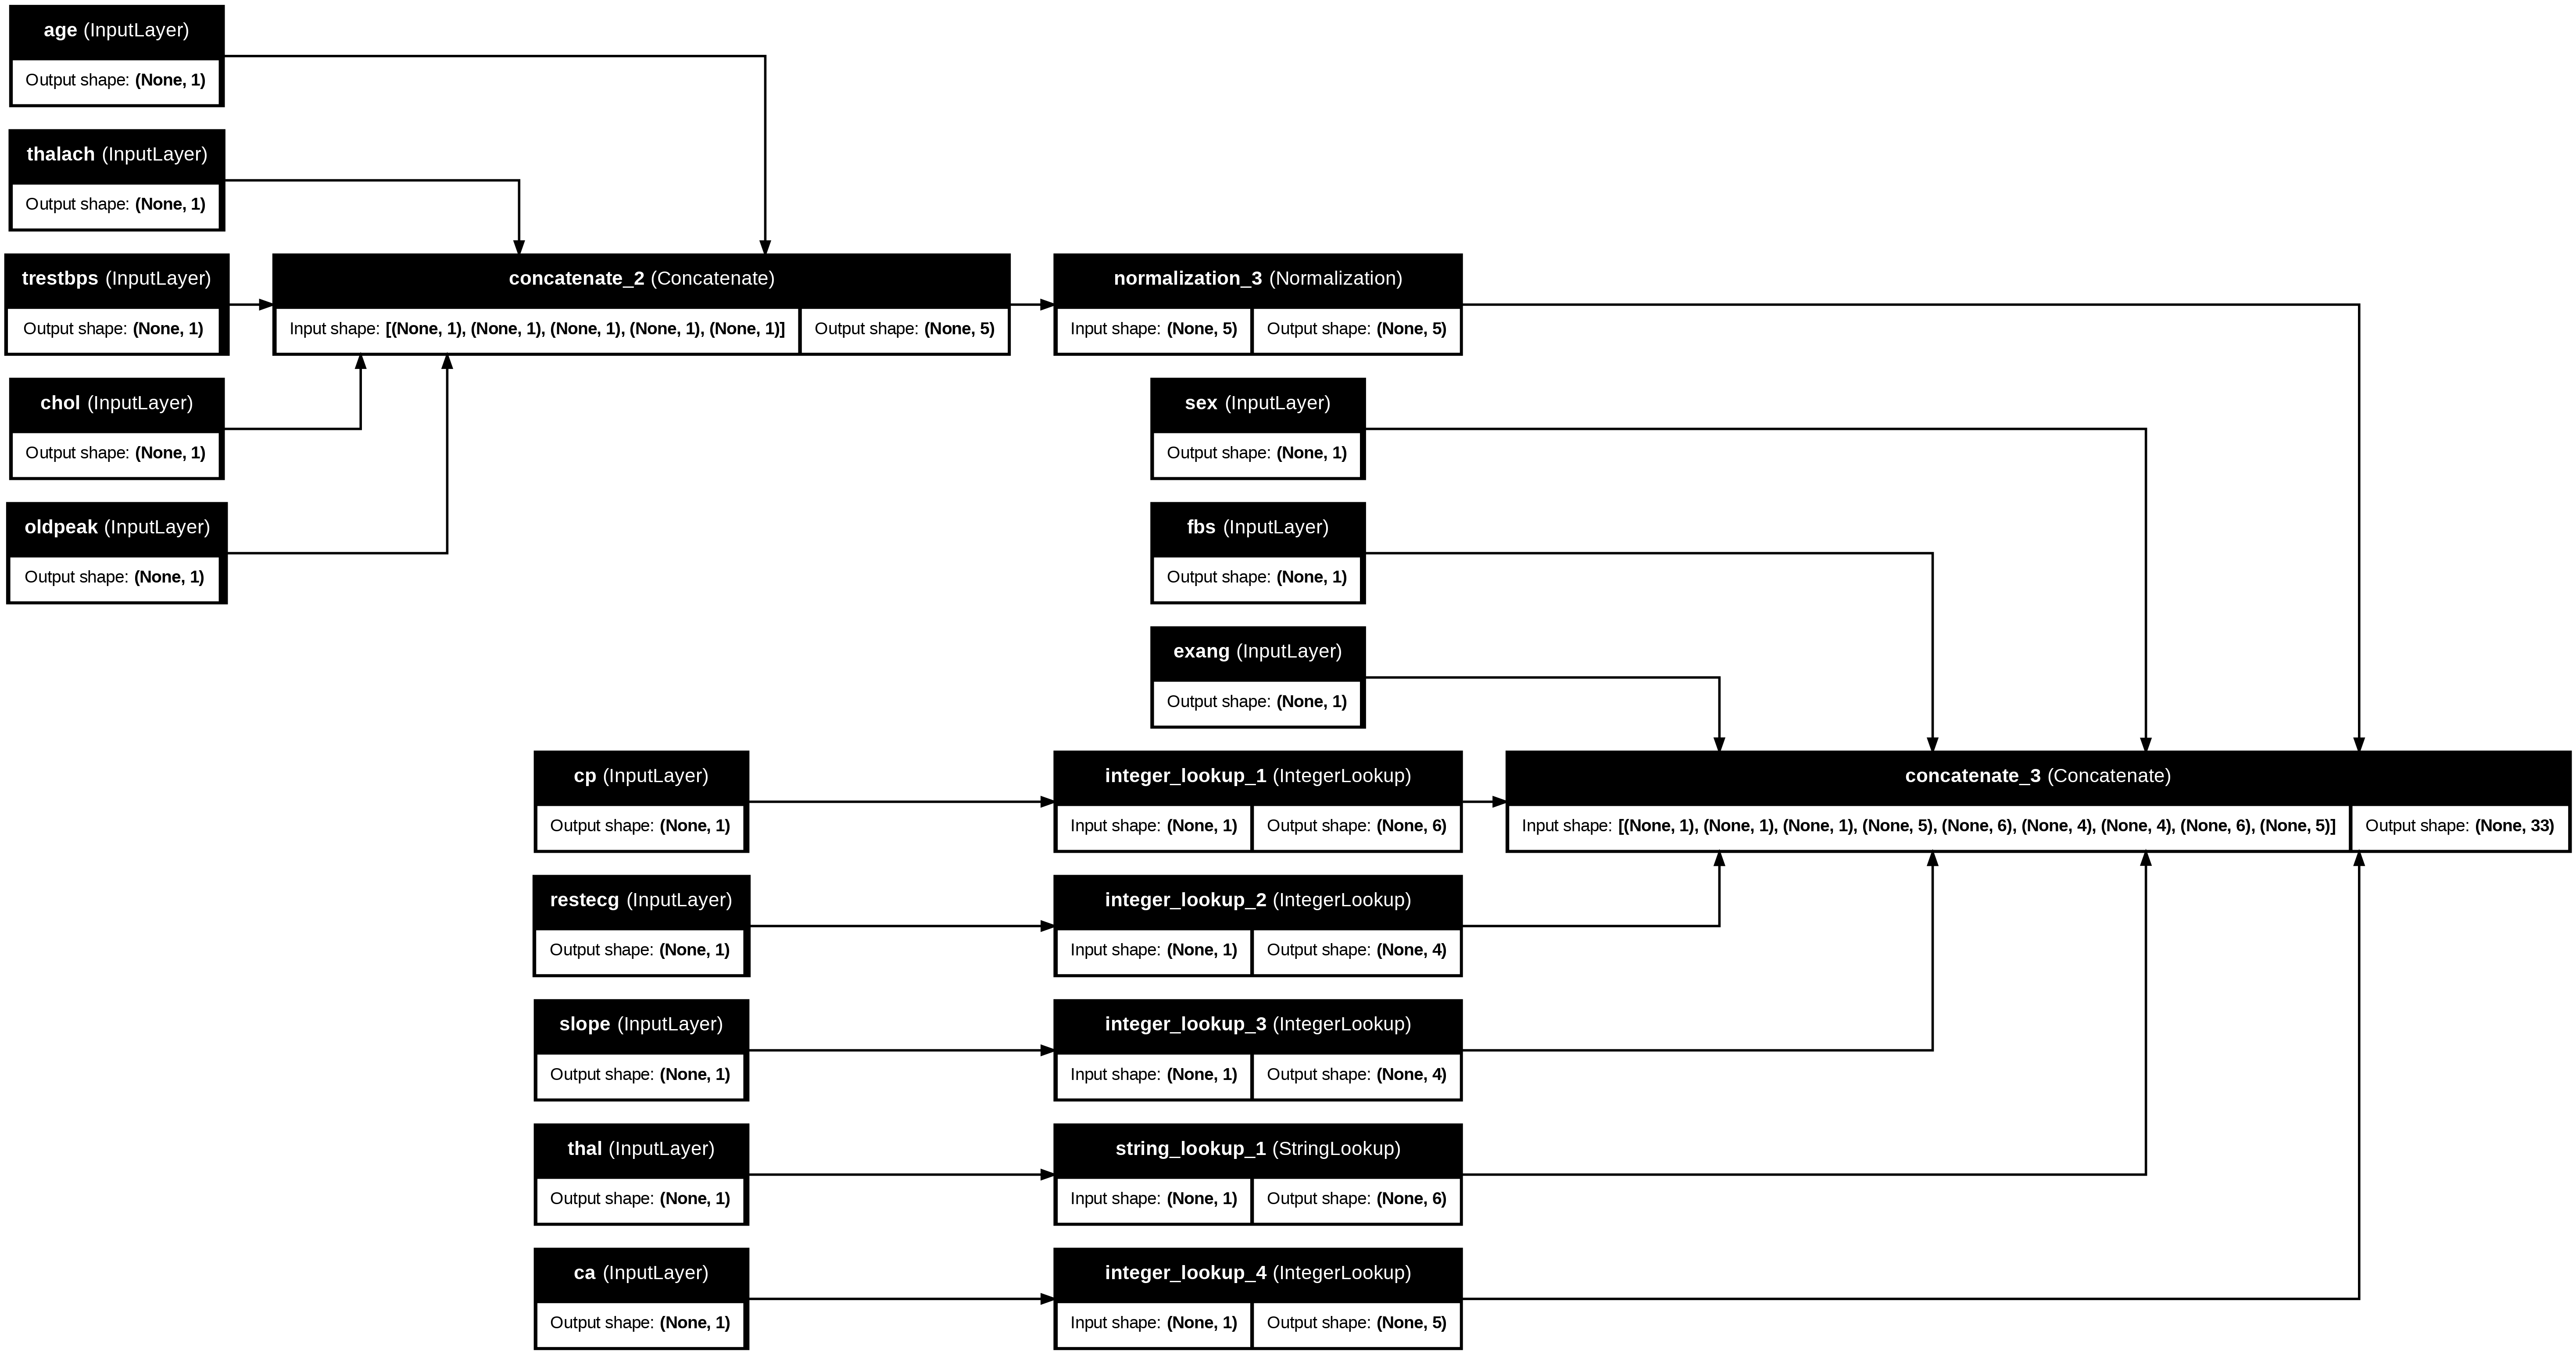

In [44]:
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True,  show_layer_names=True)

In [45]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[  1.       ,   1.       ,   0.       ,   0.93384  ,  -1.8534899,
        123.75735  ,   3.6224306,  -7.3077087,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   1.       ,   0.       ,   0.       ,
          0.       ,   1.       ,   0.       ,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   1.       ,
          0.       ,   0.       ,   0.       ]], dtype=float32)>

Ön işleme aşamasını tamamladık. Verilerimize türlerine göre ön işlemler uygulayarak TensorFlow modelimiz için uygun hale getirdik. Bir sonraki adımda model oluşturup eğitimini gerçekleştireceğiz.

## Bir model oluşturun ve eğitin

In [46]:
# Model
body = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [47]:
inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'sex': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=sex>,
 'cp': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cp>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=chol>,
 'fbs': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fbs>,
 'restecg': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=restecg>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=thalach>,
 'exang': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=exang>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=oldpeak>,
 'slope': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=slope>,
 'ca': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=ca>,
 'thal': <KerasTensor shape=(None, 1),

In [48]:
x = preprocessor(inputs)
x

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, name=keras_tensor_29>

In [49]:
result = body(x)
result

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_34>

In [50]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

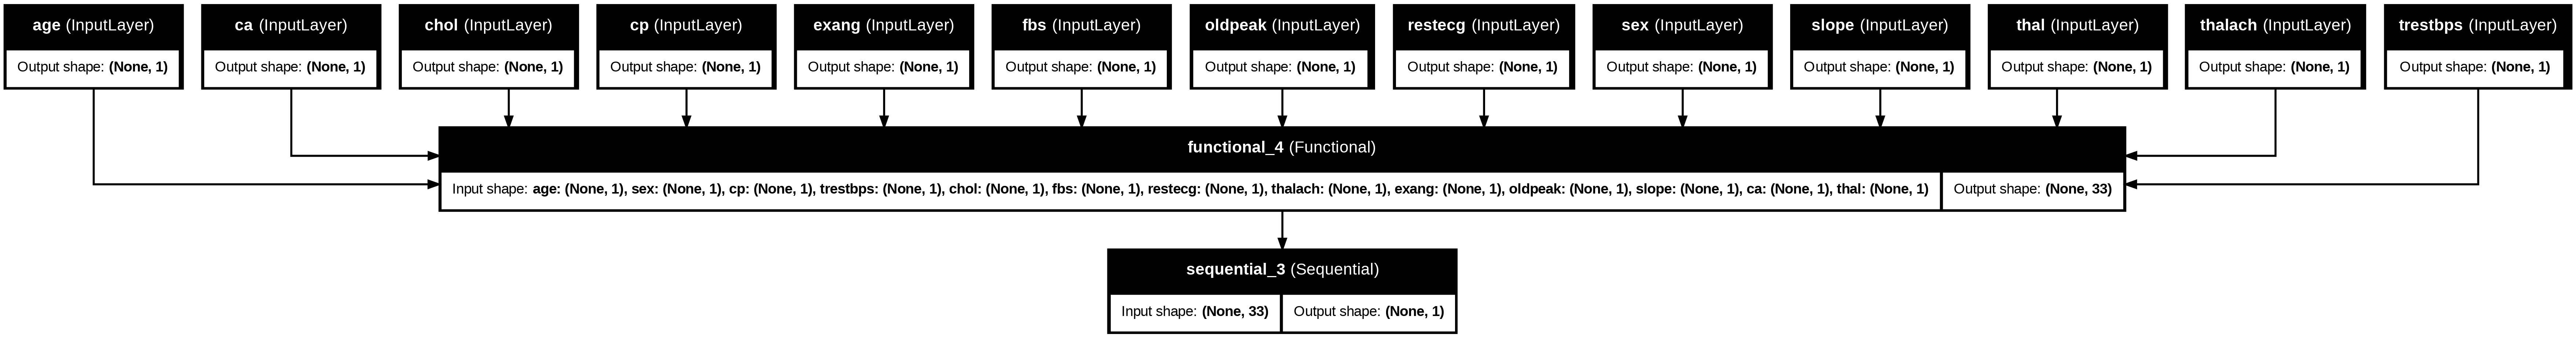

In [51]:
tf.keras.utils.plot_model(model, show_shapes=True,  show_layer_names=True)

In [52]:
history = model.fit(dict(df), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4787 - loss: 2.9062
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7328 - loss: 0.5613
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7205 - loss: 0.5240
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7450 - loss: 0.4920
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7565 - loss: 0.4739


tf.data fonksiyonunu kullanarak da ön işleme işlemlerini gerçekleştirebiliriz.

In [53]:
ds = tf.data.Dataset.from_tensor_slices((
    dict(df),
    target
))

ds = ds.batch(BATCH_SIZE)

In [54]:
import pprint

for x, y in ds.take(1):
  pprint.pprint(x)
  print()
  print(y)

{'age': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([63, 67])>,
 'ca': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 3])>,
 'chol': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([233, 286])>,
 'cp': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 4])>,
 'exang': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1])>,
 'fbs': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 0])>,
 'oldpeak': <tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.3, 1.5])>,
 'restecg': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 2])>,
 'sex': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>,
 'slope': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 2])>,
 'thal': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'fixed', b'normal'], dtype=object)>,
 'thalach': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([150, 108])>,
 'trestbps': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([145, 160])>}

tf.Tensor([0 1], shape=(2,), dtype=int64)


In [55]:
history = model.fit(ds, epochs=5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7602 - loss: 0.4093
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7919 - loss: 0.3905
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7826 - loss: 0.3748
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.3627
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8058 - loss: 0.3534


# Sonuc
Bir bölümün daha sonuna geldik. Bu bölümde pandas.DataFrame'i inceledik ve DataFrame verilerini tensör formatındaki verilere dönüştürdük. Aynı zamanda modeller için uygun olmayan veri türlerine de ön işlemler uygulayarak bu verileri model için uygun hale getirdik. Umarım çalışmam sizin için faydalı olmuştur. İyi günler, iyi çalışmalar dilerim.

Aşağıdaki Linklerden beni takip edebilir ve yapacağım çalışmalardan haberdar olabilirsiniz!<br>
[Linkedin](https://www.linkedin.com/in/ihsancenkiz/)<br>
[Github](https://github.com/ihsncnkz)<br>
[Kaggle](https://www.kaggle.com/ihsncnkz)